# STUDY OF U.S. MASS SCHOOL SHOOTINGS
## By: Gavin Schilling

### Introduction

While there are records of instances of school shootings in the United States dating back to the Enoch Brown school massacre in Greencastle, PA on July 26, 1764, the first mass school shooting according to the modern convention of counting a mass school shooting as being a three person or more casualty on the actual school grounds did not occur until March 26, 1893 in Plain Dealing, LA during an evening dance at the school.  According to Wikipedia between then and 1966 only three other mass school shootings occurred.  They were as follows:

* The December 13, 1898 Charleston, WV school exhibition incident killing 6 and wounding at least 1 other
* The May 6, 1940 Pasadena, CA - South Pasadena Junior High School - murders leaving 5 dead and 2 others wounded
* The February 2, 1960 Hartford City, IN - William Reed School - shooting killing 3

This means that only four modern day standard mass school shootings occurred before 1966 even though around 130 school-related shootings are on record with Wikipedia from this early time period in America history.  Thankfully, the rest of these horrific events do not meet the modern definition of being a mass school shooting by today's standards as outlined above.

In 1968 & 1970, a total of 9 student protesters were killed and another 48 were injured at the hands of United States government officers.  Those two years the following three major mass incidents occurred included the disgraceful South Carolina State University racist protesters in Orangeburg, SC on February 8, 1968, the Kent State University Vietnam War protesters being gunned down by armed National Guard solders on May 4, 1970 in Kent, OH, and when the police shot the protestors at the Jackson State University in Jackson, MS over the United States' military presence in Cambodia on May 15, 1970 (occurring only eleven days following the Kent State massacre).

While, the Columbine High School massacre did not happen until 1999, these attacks by the United States government and the August 1, 1966 University of Texas - Austin massacre in Austin, Texas killing 17 and wounding 31 paired with the November 12, 1966 (roughly 3.5 months after the University of Texas massacre) in Mesa, AZ where 5 died and another 2 were injured, set off a new type of shock value for the vast increase number killed in any particular incident.

Now, in the first month and a half of 2018, the United States not only has had the deadliest mass school shooting in United States history, but has had the school shooting rate increase to 1 occurring in every 60 hours.  Many National Rifle Association (NRA) backed politicians continue to look the other way or actively try to stall any and all gun-control reform or legislation.

### Hypothesis

While it is clear that gun violence is not possible without guns, the interpretation of the *Second Amendment* of *The Bill of Rights* to the *United States Constitution* protects at least some of her citizens to bare arms under certain well-regulated circumstances as follows: "A well regulated Militia, being necessary to the security of a free State, the right of the people to keep and bear Arms, shall not be infringed."  These restriction of being first well-regulated, governed under a lawful collective body, and being protected only at times of necessity of securing a free State not only is the law, but also there in this the Founders brilliance which lies both the pearls of wisdom and the rub as to any ambiguity.  It is clear from the wording of this amendment verses all the others to-date that the Founders signing the Constitution clearly intended it to have breathing room in case of a foreign invasion, civil war, hunting, or any other communal benefit as described by the federal or local government as it is their most basic duty to The People to protect and defend the country and all her citizens.

Having said that, I believe we as a society have run a stray regarding gun mentality.  In the days of the "Wild West," salon and high noon shootouts occurred far too frequently.  As did armed bandits, robbers, and criminal behaviors we have tried desperately to outlaw ever since including from the 1920 mobster crime family sprees -- sometimes to what appears no to little avail.  That having been said, the **National Rifle Association (NRA)** has over extended its duties to protect the 2nd Amendment, and has in the words of my former professor and Noble Prize winner, Noam Chomsky, created an illegal "Profit Over People" enterprise.  Under the current state of the NRA, politicians (mostly Republican) have been bought off by this special interest group with campaign contributions, bribes, and disinformation campaigns as reported by most of the world's most major media news outlets.

Therefore, ***it is my intention to look into these claims and see if the data shows increases of mass gun violence in either low gun control states or in states where U.S. congressional members' NRA ratings are higher.***  If this data does show this then the legislative solution might favor changes to states alone on a state-by-state basis.  If not, the data might then mean that due to being a free interstate society that stricter gun laws must come top down from the Federal government in order to solve the gun violence epidemic sweeping every state of the country.  One thing is for certain, change can not come fast enough, but over regulation historically leads to an increase in crime and eventual reversal of sensability.

### Procedures

First, as a best practice we import our required libraries at the top of a file (both for easy access and documenting reference; as well as, for the functional purpose of ensuring the file has been properly loaded prior to any need within the program itself).

In [1]:
# Import Libraries

%matplotlib inline

from csv import DictReader
from http import HTTPStatus
from io import BytesIO
from json import loads
from sqlite3 import connect, Error
from urllib.request import build_opener, urlopen
from zipfile import ZipFile

import matplotlib.pyplot as plt
import pandas as pd
import requests
from bs4 import BeautifulSoup
from openpyxl import load_workbook

Next, let's retrieve the first dataset necessary for the project via the internet -- the *Stanford MSA Database*.

In [2]:
# Unzip Stanford MSA Database CSV file

msa_url = "https://stanford.box.com/shared/static/75lmj9rvw9mhtfqfjijhcc6oa15o5m4a.zip"
open_msa_url = urlopen(msa_url)
msa_zipped = ZipFile(BytesIO(open_msa_url.read()))
msa_zipped.extractall('store')
msa_zipped.namelist() # Proves proper connection occured
print("Zip File List: \n", msa_zipped.filelist)
msa_zipped.close()

Zip File List: 
 [<ZipInfo filename='MSA/' filemode='drwxr-xr-x' external_attr=0x4000>, <ZipInfo filename='MSA/Stanford_MSA_Data_Dictionary (V.5).pdf' compress_type=deflate filemode='-rw-r--r--' external_attr=0x4000 file_size=423971 compress_size=371098>, <ZipInfo filename='__MACOSX/' filemode='drwxrwxr-x' external_attr=0x4000>, <ZipInfo filename='__MACOSX/MSA/' filemode='drwxrwxr-x' external_attr=0x4000>, <ZipInfo filename='__MACOSX/MSA/._Stanford_MSA_Data_Dictionary (V.5).pdf' compress_type=deflate filemode='-rw-r--r--' external_attr=0x4000 file_size=181 compress_size=102>, <ZipInfo filename='MSA/Stanford_MSA_Database_for_release_06142016.xlsx' compress_type=deflate filemode='-rw-r--r--' external_attr=0x4000 file_size=519599 compress_size=399034>, <ZipInfo filename='__MACOSX/MSA/._Stanford_MSA_Database_for_release_06142016.xlsx' compress_type=deflate filemode='-rw-r--r--' external_attr=0x4000 file_size=181 compress_size=102>]


Now lets transverse the virtual file structure to the appropriate worksheet.

In [3]:
# Load Workbook & Proper Worksheet

try:
    workbook = load_workbook('store/MSA/Stanford_MSA_Database_for_release_06142016.xlsx')
    worksheet = workbook.active
    HTTPStatus.OK.description

    print("Workbook Path: \n", workbook.path, "\n")
    print("Active Worksheet: \n", worksheet)

except Error as error:
    print("Error: \n", error)

Workbook Path: 
 /xl/workbook.xml 

Active Worksheet: 
 <Worksheet "Published">


Now lets create the SQL database connection.

In [4]:
# Create a SQL database connection

DB_FILE = 'temp/mass_shootings.db'

conn = connect(DB_FILE)
print("SQL Connection: \n", conn, "\n")     # Proof of Creation

conn.text_factory = str
print("Conn Text Factory: \n", conn.text_factory, "\n")

c = conn.cursor()
print("Cursor 1: \n", c.arraysize, "\n")    # Proof of Creation

table_name = "Shootings"
print("Table Name: \n", table_name)

SQL Connection: 

Conn Text Factory: 
 <class 'str'> 

Cursor 1: 
 1 

Table Name: 
 Shootings


In [5]:
# Read Streamed Excel file

df_msa_xls = pd.read_excel('store/MSA/Stanford_MSA_Database_for_release_06142016.xlsx',
                           'Published',
                           index_col='CaseID')
print("MSA XLS: \n", df_msa_xls)
# msv_cvs = msa_xls.to_csv('store/MSA/Stanford_MSA_Database_for_release.csv', encoding='utf-8', index=False)


MSA XLS: 
                                               Title  \
CaseID                                                
1                     University of Texas at Austin   
2                        Rose-Mar College of Beauty   
3                      New Orleans Police Shootings   
4                    Clara Barton Elementary School   
5                                 Olean High School   
6              Los Angeles Computer Learning Center   
7                               Cal State Fullerton   
8                Grover Cleveland Elementary School   
9                      University of South Carolina   
10                               Valley High School   
11                            Welding shop in Miami   
12                          Wah Mee Club in Seattle   
13                             Johnston Post Office   
14                    49th Street Elementary School   
15                           Ianni's Club in Dallas   
16              McDonald's restaurant in San Ysidro   

In [11]:
with open('store/MSA/Stanford_MSA_Database_for_release.csv',
          encoding='utf-8',
          newline='') as csv_file:
    msa_reader = DictReader(csv_file,
                            delimiter="\t",
                            dialect='excel',
                            quotechar='"',
                            skipinitialspace=True)
    
    fieldnames = msa_reader.fieldnames
    if fieldnames == str(fieldnames).find(" "):
        fieldnames = [name.replace(name, '"' + name + '"') for name in fieldnames]
    print("MSA Reader: \n", fieldnames, "\n")
    
    table_name = 'Shootings'
    counter = 0

    drop_sql = f"DROP TABLE IF EXISTS {table_name};"
    c.execute(drop_sql)
    print("Drop SQL: \n", drop_sql, "\n")

    create_sql_table = f"CREATE TABLE {table_name} ({', '.join([ f'{column.strip()}' for column in fieldnames])})"
    print("Create SQL Table: \n", create_sql_table, "\n")

    insert_sql = f"INSERT INTO {table_name} VALUES ({', '.join([ '?' for column in row ])})"
        for row in msa_reader:
            try:
                counter += 1
                print("Record #", counter, ":\n", row, "\n")

            except Error as error:
                exit(f'file {csv_file},'
                    f'line {msa_reader.line_num}: {error}')
                print(error)

conn.commit()
c.close()

IndentationError: unexpected indent (<ipython-input-11-3edf102b70ce>, line 26)

While every Congress is unique, within the follwing file is the makeup of the 2015 - 2016 U.S. Congress as reported by *The Washington Post*.

In [7]:
# File for Web Scrapping & Parsing

gun_legislation_url = 'https://www.washingtonpost.com/graphics/national/gun-legislation/'
gun_legislation_html_soup = BeautifulSoup(urlopen(gun_legislation_url), 'html.parser')
stats_json_string = gun_legislation_html_soup.find('script', attrs={'src': 'js/base.js?c=a90e33a675e9d0ac31328c0ce0d2e12b16035540'})
print(stats_json_string)

<script charset="utf-8" src="js/base.js?c=a90e33a675e9d0ac31328c0ce0d2e12b16035540" type="text/javascript"></script>


Having discovered where the data lives, we then must convert the JavaScript file ready for parsing.  In this case we cut off the top and bottom code sections, then replace the unquoted keywords to being double-quoted per the JSON library's requirement for parsing.

In [8]:
full_gun_legislation_url = 'https://www.washingtonpost.com/graphics/national/gun-legislation/js/base.js?c=a90e33a675e9d0ac31328c0ce0d2e12b16035540'
legislation_request = requests.get(full_gun_legislation_url)

try:
    # print("Headers: \n", legislation_request.headers, "\n")
    b = legislation_request.text.find("{first:")
    e = legislation_request.text.find(":6}]")
    scrape = legislation_request.text[b - 1:e + 4]

    scrape = scrape.replace('first:', '"first":')
    scrape = scrape.replace('last:', '"last":')
    scrape = scrape.replace('fullLast:', '"fullLast":')
    scrape = scrape.replace('party:', '"party":')
    scrape = scrape.replace('house:', '"house":')
    scrape = scrape.replace('state:', '"state":')
    scrape = scrape.replace('control:', '"control":')
    scrape = scrape.replace('rights:', '"rights":')
    scrape = scrape.replace('id:', '"id":')
    scrape = scrape.replace('score:', '"score":')
    scrape = scrape.replace('pi:', '"pi":')
    scrape = scrape.replace('grade:', '"grade":')
    scrape = scrape.replace('gi:', '"gi":')

    json_scrape = loads(scrape)
    # print("Scrape: \n", json_scrape, "\n")

except Error as error:
    print("Error Status Code: \n", legislation_request.status_code)

In [9]:
# Headers

first = json_scrape[0]["first"]
last = json_scrape[0]["last"]
fullLast = json_scrape[0]["fullLast"]
party = json_scrape[0]["party"]
house = json_scrape[0]["house"]
state = json_scrape[0]["state"]
control = json_scrape[0]["control"]
rights = json_scrape[0]["rights"]
id = json_scrape[0]["id"]
score = json_scrape[0]["score"]
pi = json_scrape[0]["pi"]
grade = json_scrape[0]["grade"]
gi = json_scrape[0]["gi"]

data = [first, last, fullLast, party, house, state, control, rights, id, score, pi, grade, gi]
table_name = "Legislation"
counter = 0

c = conn.cursor()

c.execute('DROP TABLE IF EXISTS table_name')
c.execute('CREATE TABLE IF NOT EXISTS table_name'
          '('
          'first,'
          'last,'
          'fullLast,'
          'party,'
          'house,'
          'state,'
          'control,'
          'rights,'
          'id,'
          'score,'
          'pi,'
          'grade,'
          'gi'
          ')')

for row in json_scrape:
    insertsql = f"INSERT INTO {table_name} VALUES ({', '.join([ '?' for column in row ])})"
    counter += 1
    print("Record #", counter, ":\n", row, "\n")

# Close the SQL connection to our SQLite database
conn.commit()
c.close()


Record # 1 :
 {'first': 'Ralph', 'last': 'Abraham', 'fullLast': 'Abraham', 'party': 'r', 'house': 'h', 'state': 'LA', 'control': [], 'rights': [59, 62, 64, 70, 74, 75, 90, 94, 84], 'id': 0, 'score': 9, 'pi': 1, 'grade': 'AQ', 'gi': 13} 

Record # 2 :
 {'first': 'Alma', 'last': 'Adams', 'fullLast': 'Adams', 'party': 'd', 'house': 'h', 'state': 'NC', 'control': [2, 9, 10, 14, 15, 17, 31, 37, 40, 50, 53], 'rights': [], 'id': 1, 'score': -11, 'pi': 0, 'grade': 'F', 'gi': 0} 

Record # 3 :
 {'first': 'Robert', 'last': 'Aderholt', 'fullLast': 'Aderholt', 'party': 'r', 'house': 'h', 'state': 'AL', 'control': [], 'rights': [64, 71, 78, 90, 94], 'id': 2, 'score': 5, 'pi': 1, 'grade': 'A', 'gi': 1} 

Record # 4 :
 {'first': 'Pete', 'last': 'Aguilar', 'fullLast': 'Aguilar', 'party': 'd', 'house': 'h', 'state': 'CA', 'control': [9, 10, 14, 50, 53], 'rights': [], 'id': 3, 'score': -5, 'pi': 1, 'grade': 'F', 'gi': 1} 

Record # 5 :
 {'first': 'Rick', 'last': 'Allen', 'fullLast': 'Allen', 'party': 'r

Record # 407 :
 {'first': 'Bernard', 'last': 'Sanders', 'fullLast': 'Sanders', 'party': 'd', 'house': 's', 'state': 'VT', 'control': [11], 'rights': [], 'id': 406, 'score': -1, 'pi': 7, 'grade': 'D-', 'gi': 3} 

Record # 408 :
 {'first': 'Marshall', 'last': 'Sanford', 'fullLast': 'Sanford', 'party': 'r', 'house': 'h', 'state': 'SC', 'control': [], 'rights': [62, 64, 75, 78, 94], 'id': 407, 'score': 5, 'pi': 22, 'grade': 'A', 'gi': 17} 

Record # 409 :
 {'first': 'John', 'last': 'Sarbanes', 'fullLast': 'Sarbanes', 'party': 'd', 'house': 'h', 'state': 'MD', 'control': [10, 14, 19, 24, 27, 50], 'rights': [], 'id': 408, 'score': -6, 'pi': 11, 'grade': 'F', 'gi': 11} 

Record # 410 :
 {'first': 'Steve', 'last': 'Scalise', 'fullLast': 'Scalise', 'party': 'r', 'house': 'h', 'state': 'LA', 'control': [], 'rights': [62, 65, 69], 'id': 409, 'score': 3, 'pi': 15, 'grade': 'A+', 'gi': 15} 

Record # 411 :
 {'first': 'Janice', 'last': 'Schakowsky', 'fullLast': 'Schakowsky', 'party': 'd', 'house': '

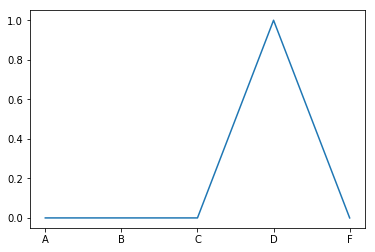

<Figure size 432x288 with 0 Axes>

In [10]:
from collections import Counter

counter = Counter(str(["grade"] for item in row))

# Separate out the counter to order it correctly when plotting.
data_list = [counter["A"],
             counter["B"],
             counter["C"],
             counter["D"],
             counter["F"]
             ]
grade_tuple = tuple(["A", "B", "C", "D", "F"])

# Assign the data to a plot
plt.plot(data_list)

# Assign labels to the plot
plt.xticks(range(len(grade_tuple[0:5])), grade_tuple)

plt.show()

# Save the plot!
plt.savefig("Grades.png")

# Close figure
plt.clf()

### Results

*Further results in results PDF file.*